In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


In [250]:
car_price=pd.read_csv("C:/Users/slnu009/Downloads/CarPrice_Assignment.csv",encoding='ISO-8859-1',low_memory=False)

In [251]:
car_price.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [252]:
car_price.isnull().sum() # No Null values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [253]:
car_price.loc[car_price.duplicated()] #No Duplcate entries

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [254]:
car_price['CompanyName']=car_price['CarName'].str.split(' ').str[0]
car_price['CompanyName']=car_price['CompanyName'].str.lower() #Convert all values to lowercase to have uniformity
# Some values have mistakes in spelling, causing redundant values hence replacing them with the correct spelling
car_price.CompanyName.replace(['toyouta','vokswagen','vw','maxda','porcshce'],['toyota','volkswagen','volkswagen','mazda','porsche'],inplace=True)
car_price['mileage']=(car_price['highwaympg']+car_price['citympg'])/2  #Average Mileage Calculation Derived variable


In [255]:
car_price.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,27.985366
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,6.666038
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,15.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,22.500000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,27.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,32.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,51.500000


<Figure size 1080x1080 with 0 Axes>

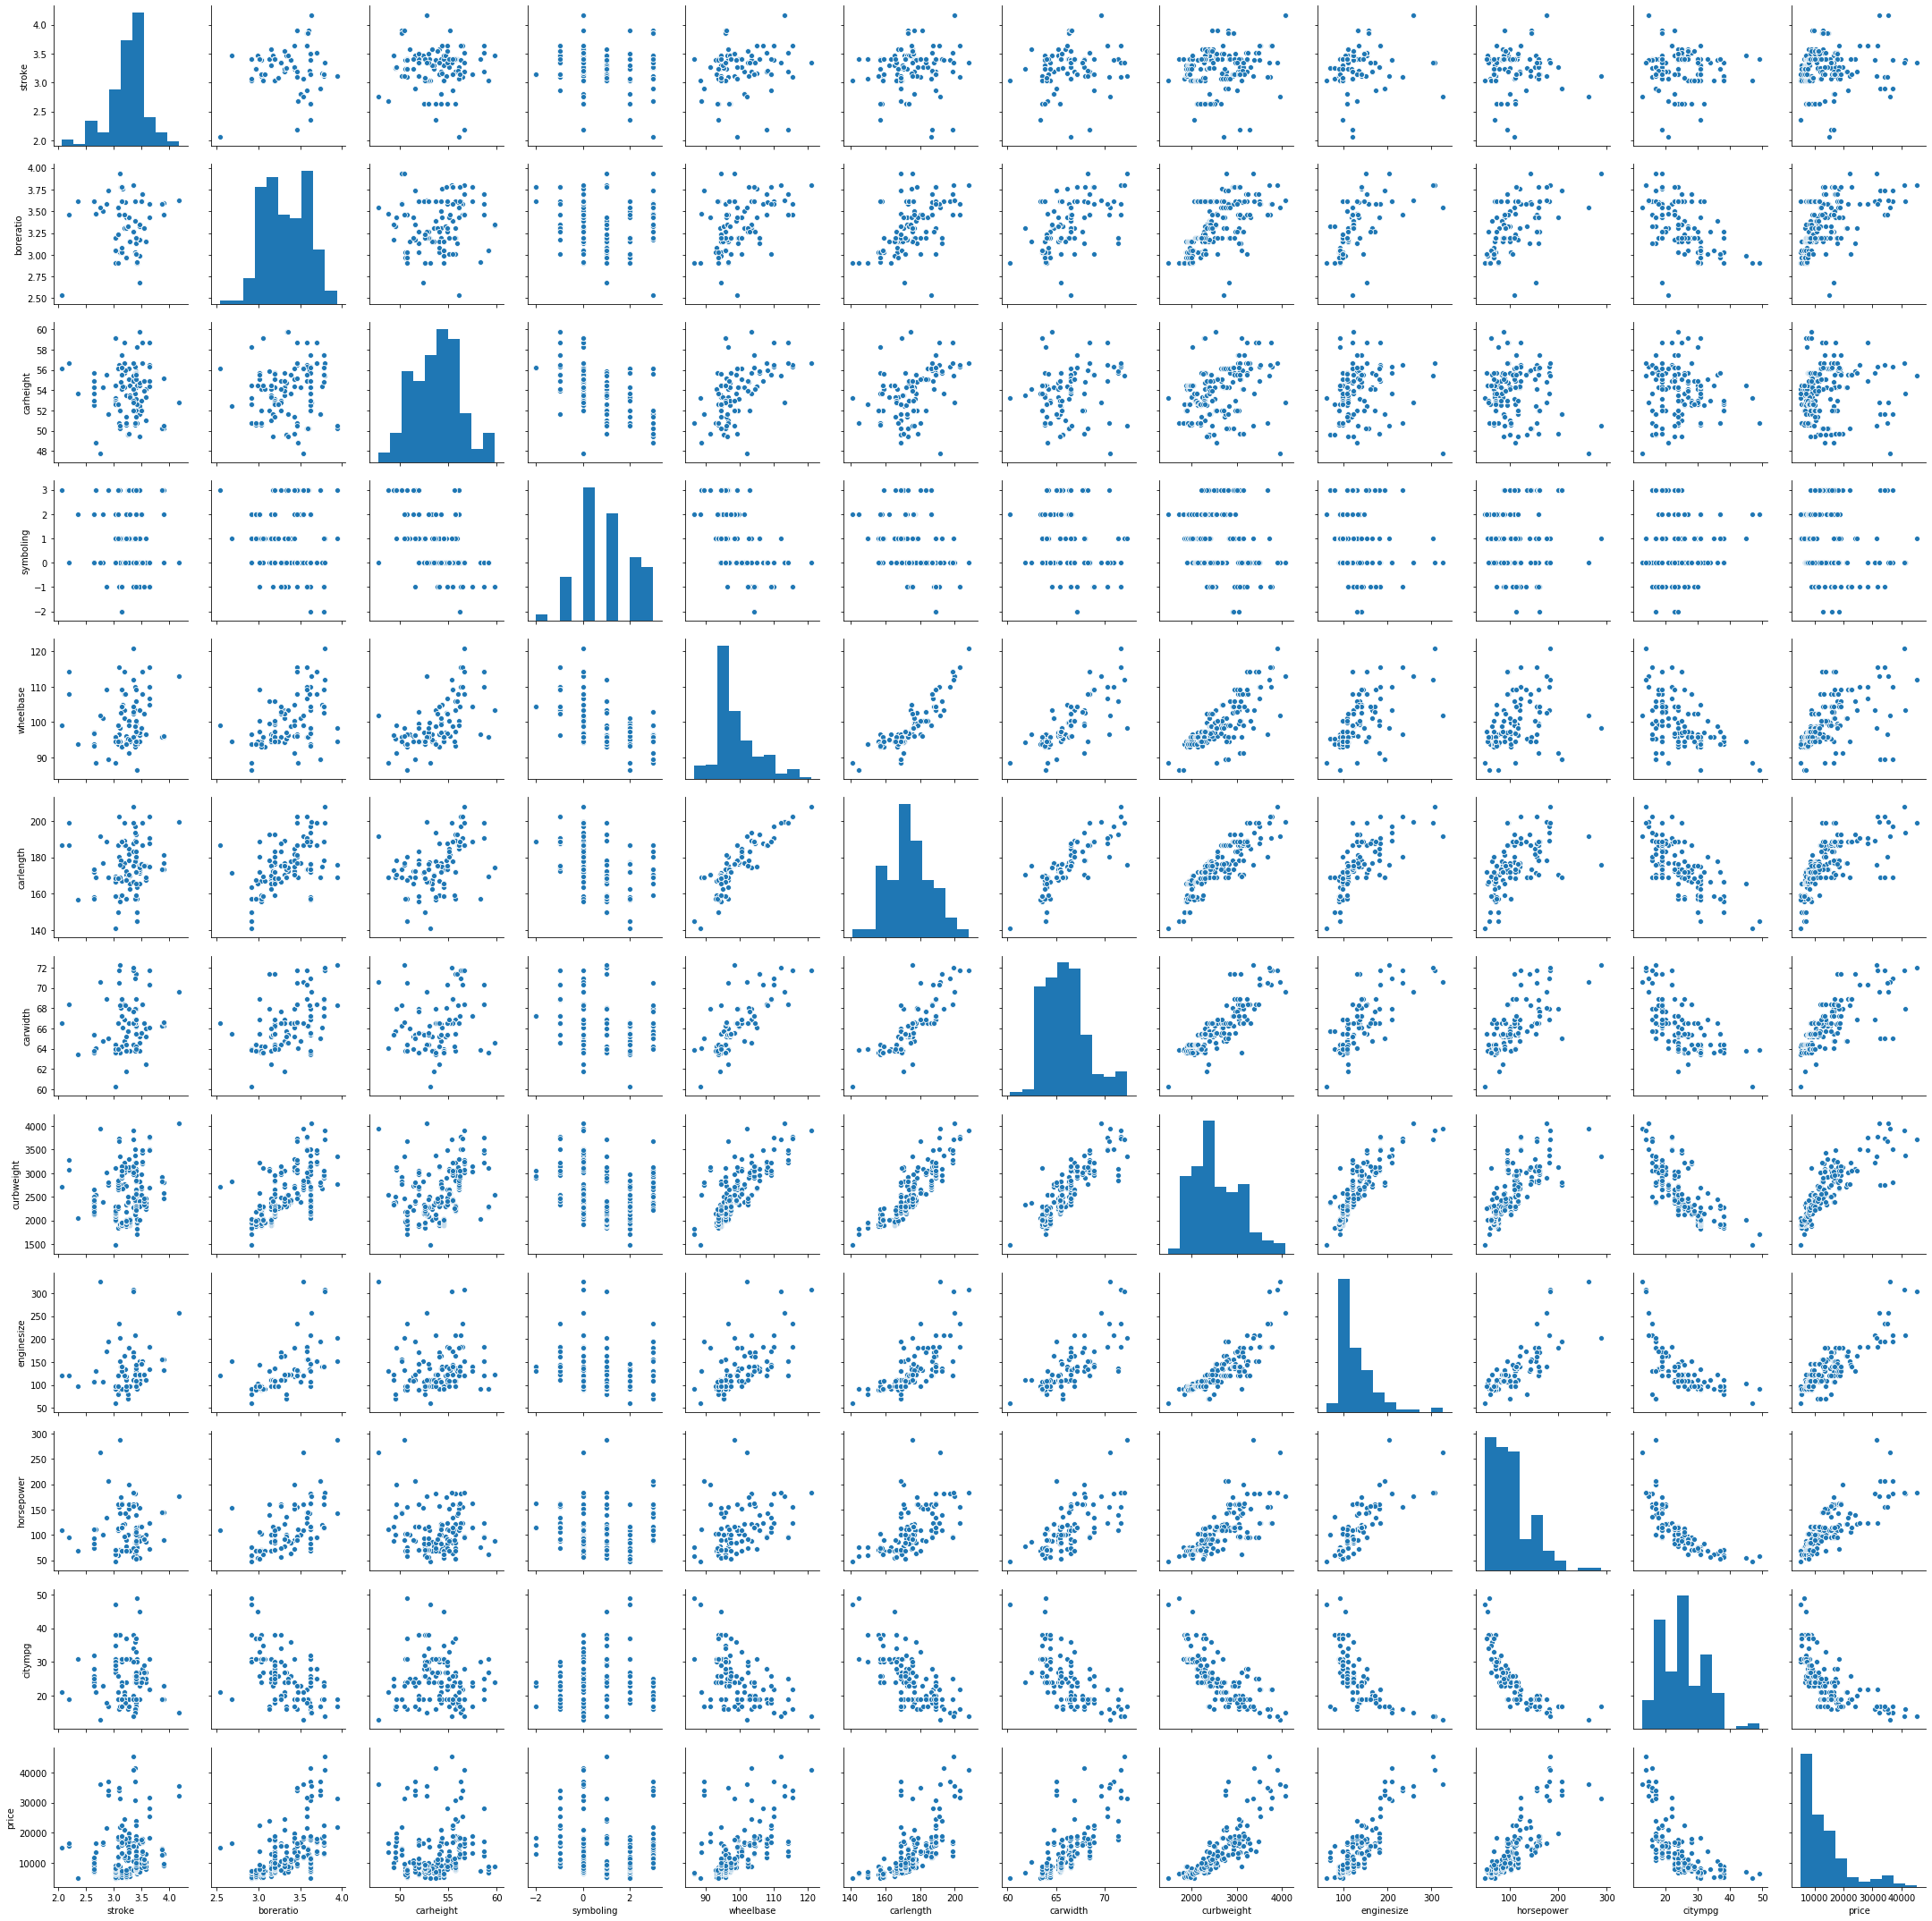

In [256]:
#From Pairplot we understand that there is a clear Linear relationsip betwwen Curbweight,Enginesize,Horsepower,Carwidth,Boreratio to the Price
# The Mileage citympg and highwaympg is decreasing as Price increases
plt.figure(figsize=(15,15))
sns.pairplot(car_price[['stroke','boreratio','enginelocation','carheight','symboling','wheelbase','carlength','carwidth','curbweight','enginesize','horsepower','citympg','price']])
plt.show()

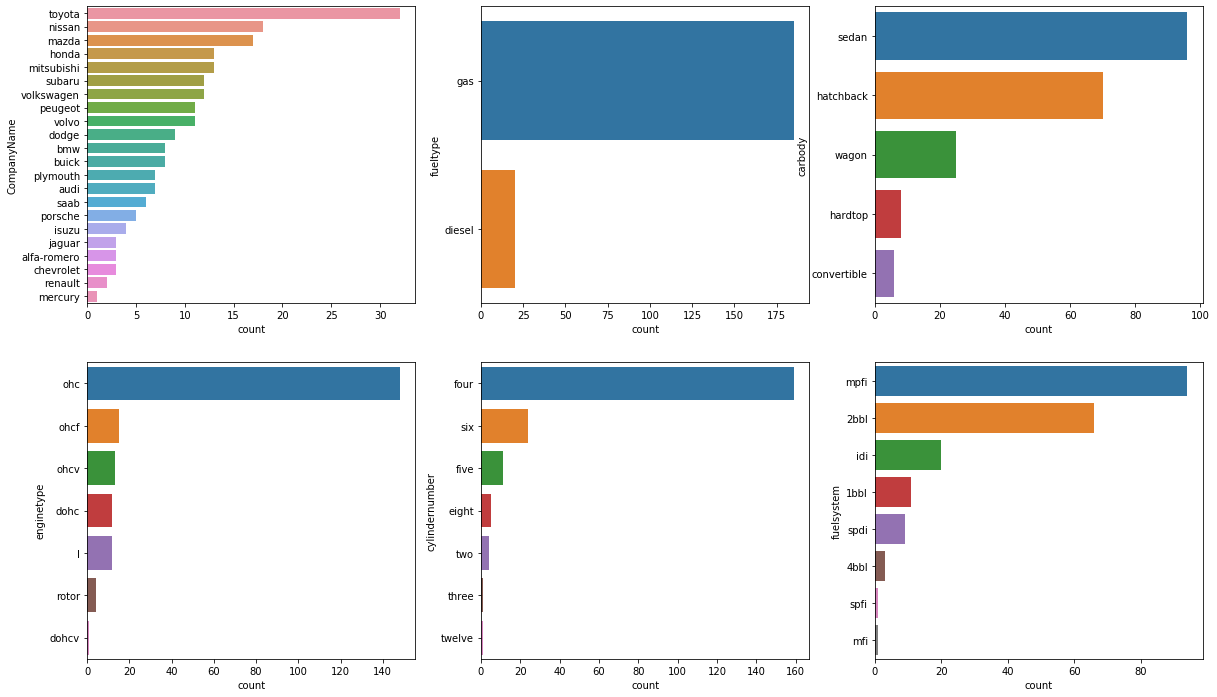

In [257]:
# Preferred Car Company is Toyota, and more cars are bought which are run on gas 
# Sedans are the preferred choice and fwd is sold more and ohc engine with 4 Cylinder and mpfli fueltype are sold the most 
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.countplot(y="CompanyName",data=car_price,order = car_price['CompanyName'].value_counts().index)
plt.subplot(2,3,2)
sns.countplot(y="fueltype",data=car_price,order = car_price['fueltype'].value_counts().index)
plt.subplot(2,3,3)
sns.countplot(y="carbody",data=car_price,order = car_price['carbody'].value_counts().index)
plt.subplot(2,3,4)
sns.countplot(y="enginetype",data=car_price,order = car_price['enginetype'].value_counts().index)
plt.subplot(2,3,5)
sns.countplot(y="cylindernumber",data=car_price,order = car_price['cylindernumber'].value_counts().index)
plt.subplot(2,3,6)
sns.countplot(y="fuelsystem",data=car_price,order = car_price['fuelsystem'].value_counts().index)

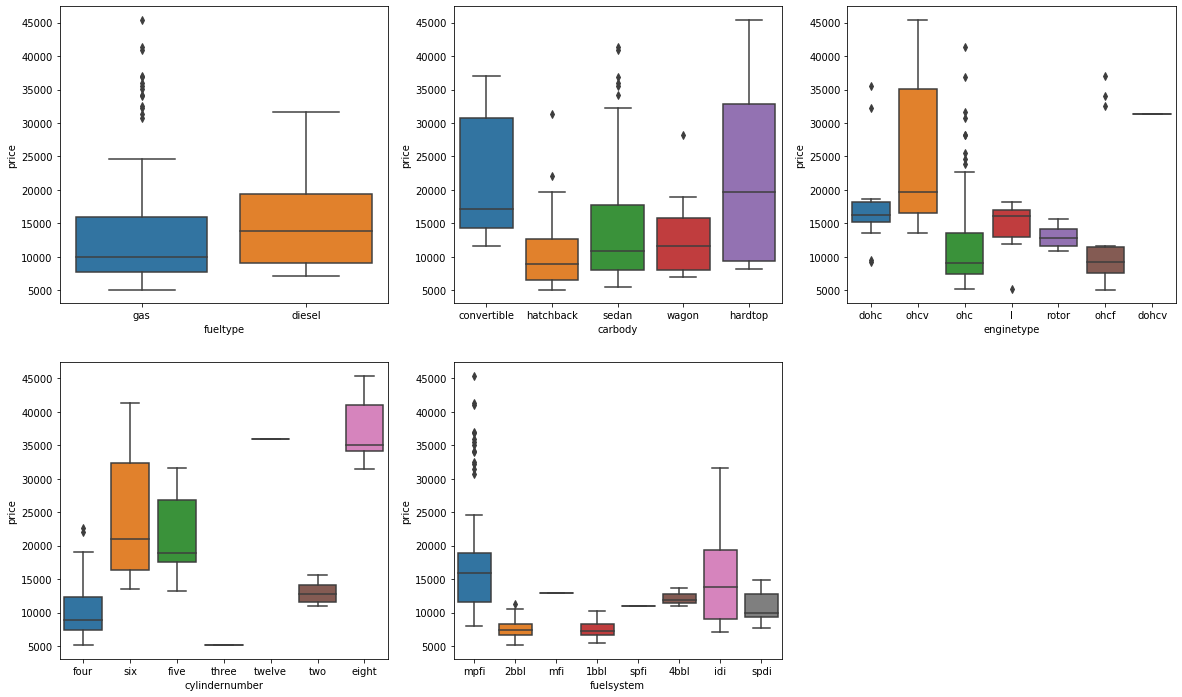

In [258]:
# Distribution of Price among various variables
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x="fueltype",y="price",data=car_price)
plt.subplot(2,3,2)
sns.boxplot(x="carbody",y="price",data=car_price)
plt.subplot(2,3,3)
sns.boxplot(x="enginetype",y="price",data=car_price)
plt.subplot(2,3,4)
sns.boxplot(x="cylindernumber",y="price",data=car_price)
plt.subplot(2,3,5)
sns.boxplot(x="fuelsystem",y="price",data=car_price)

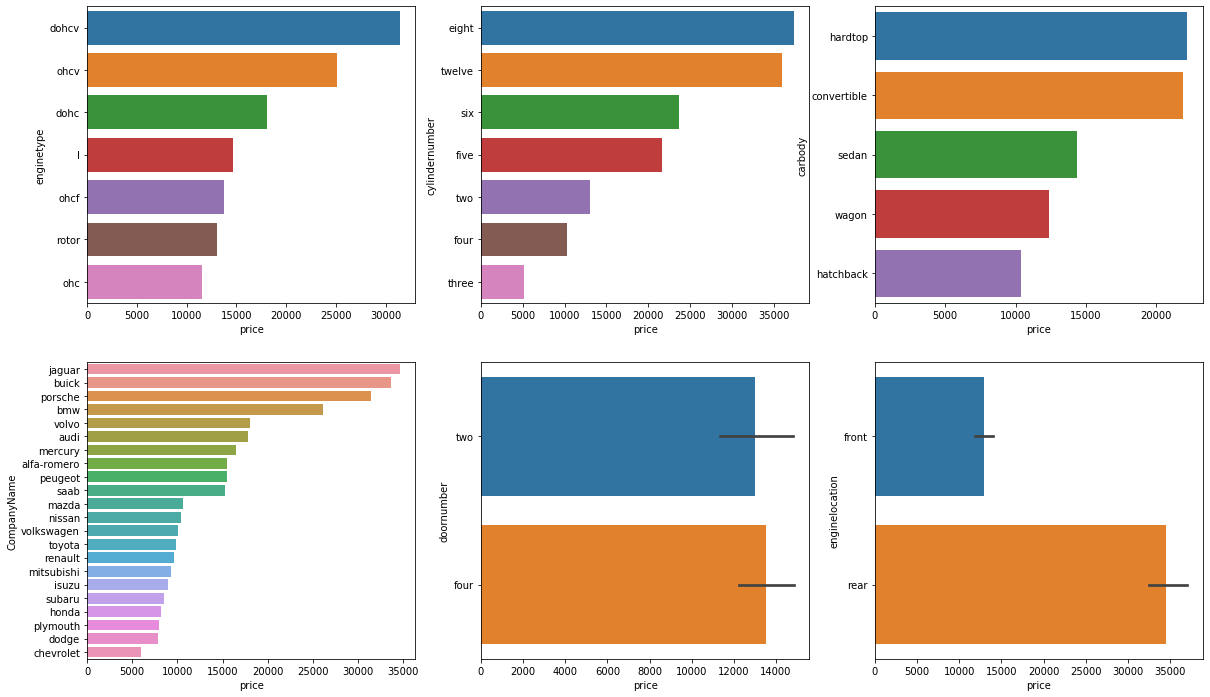

In [259]:
# We can see that the Ohc engine type and three cylinder and hatchback has the lowest price

def avg_prices(x):
    
    fd=car_price.groupby([x],sort=False).price.mean().sort_values(ascending=False)
    fd=pd.DataFrame(fd)
    fd=pd.DataFrame(fd.to_records())
    return fd
        
    

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.barplot(x="price",y="enginetype",data=avg_prices(car_price['enginetype']))


plt.subplot(2,3,2)
sns.barplot(x="price",y="cylindernumber",data=avg_prices(car_price['cylindernumber']))


plt.subplot(2,3,3)

sns.barplot(x="price",y="carbody",data=avg_prices(car_price['carbody']))
plt.subplot(2,3,4)

# Companies like Jaguar and buick and Porsche have the highest average price for cars
sns.barplot(x="price",y="CompanyName",data=avg_prices(car_price['CompanyName']))

plt.subplot(2,3,5)


sns.barplot(x="price",y="doornumber",data=car_price)

plt.subplot(2,3,6)


sns.barplot(x="price",y="enginelocation",data=car_price)



## Binning of the variable CompanyName based on Price

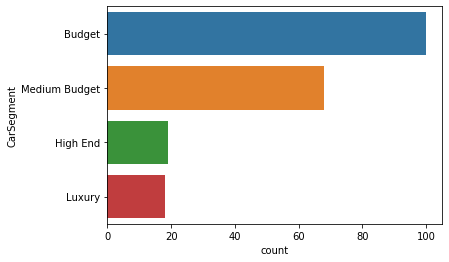

In [260]:
# Budget Segmeny is the most sold segment

car_price['CarSegment']=pd.cut(car_price['price'],[0,10000,18000,25000,100000],labels=['Budget','Medium Budget','High End','Luxury'])
sns.countplot(y="CarSegment",data=car_price,order = car_price['CarSegment'].value_counts().index)


## Bivariate Analysis

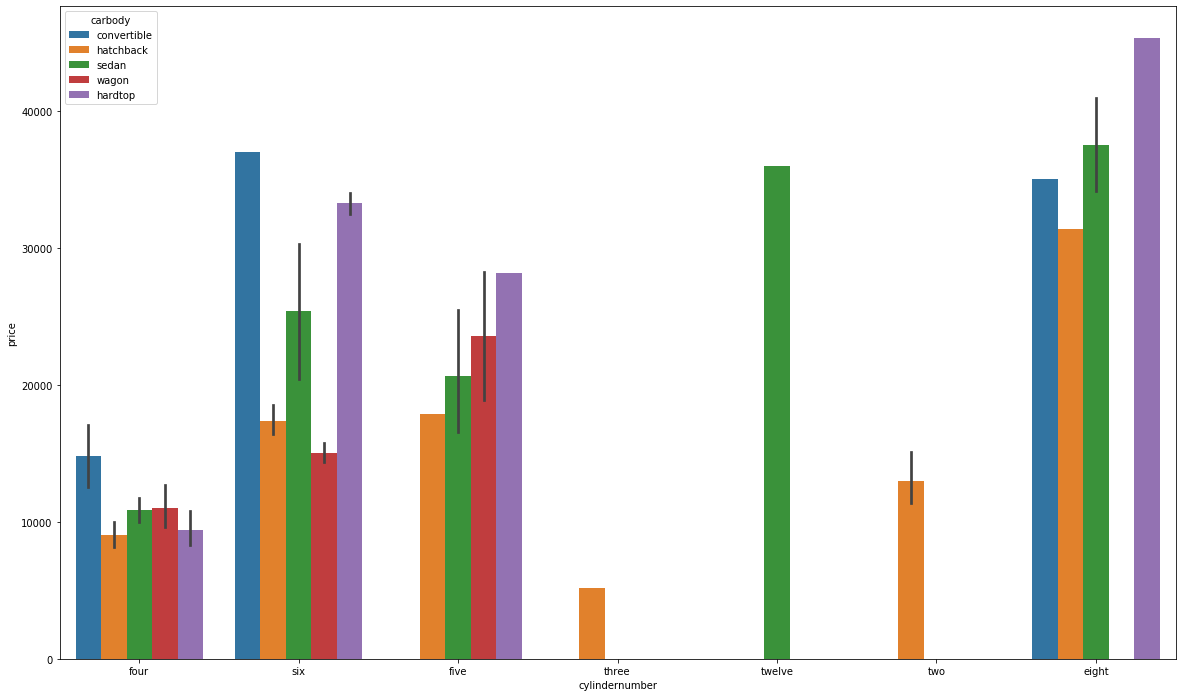

In [261]:
# Four Cylinder cars have the lowest price range Hatchback of 4 cylinders have lowest price in Four Cylinder cars
plt.figure(figsize=(20,12))
sns.barplot(x="cylindernumber",y="price",data=car_price,hue="carbody")

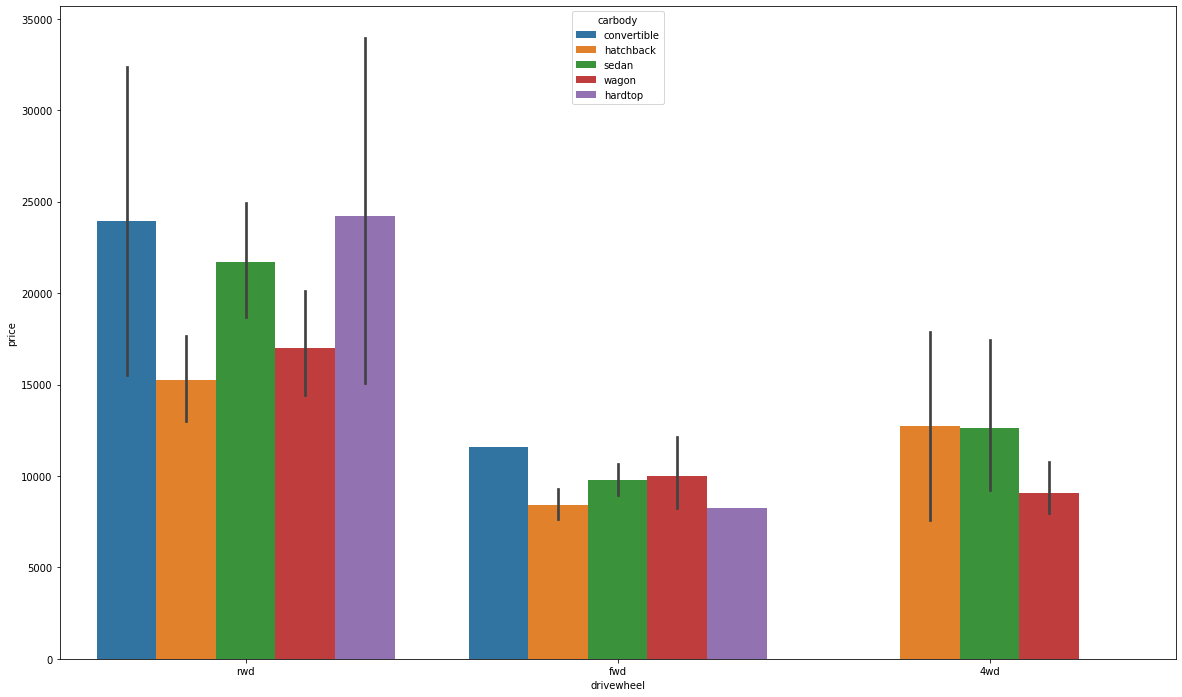

In [262]:
plt.figure(figsize=(20,12))
sns.barplot(x="drivewheel",y="price",data=car_price,hue="carbody")

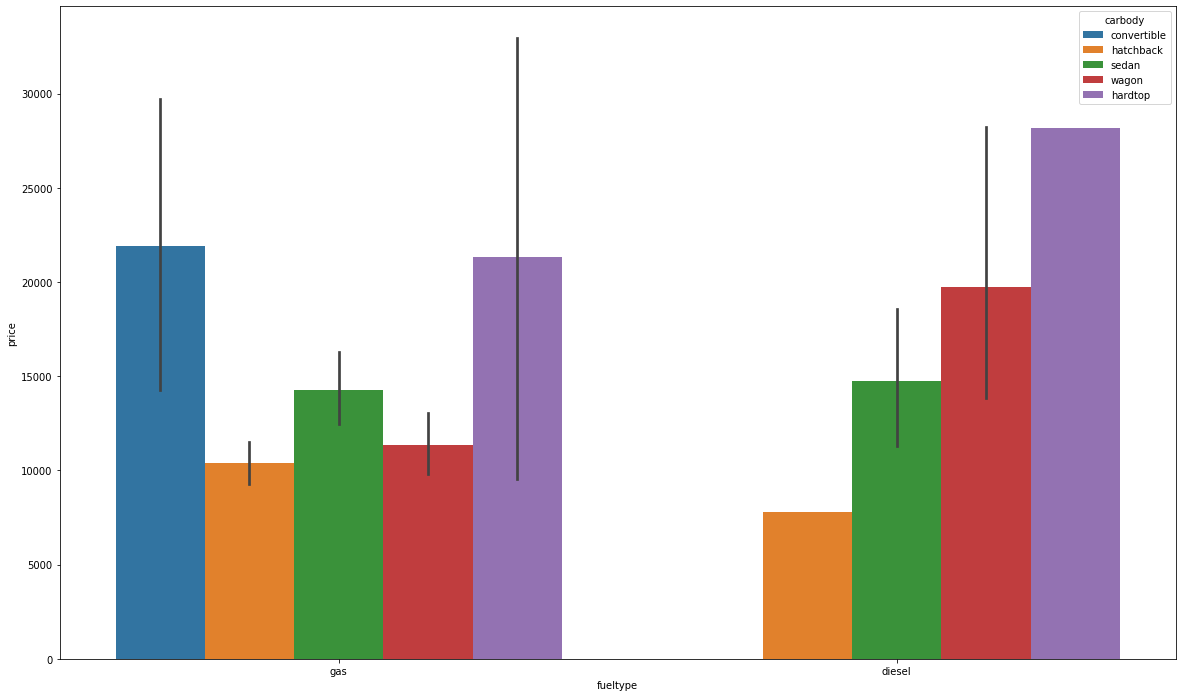

In [263]:
plt.figure(figsize=(20,12))
sns.barplot(x="fueltype",y="price",data=car_price,hue="carbody")

# From the above visuals, we can see that the 
Cylinder Number, 
Engine Size(Pairplot),
boreratio(pairplot),
drivewheel,
wheelbase(Pairplot),
horsepower(Pairplot),
curbweightPairplot),
carbody,
CarSegment,
mileage,
enginetype are important variables for analysis

## Encoding of Variables - Conversion of Categorical variables to numerical types

In [264]:
# Label Encoding the below variables as they have only two values for them
le = LabelEncoder()
car_price['doornumber']=le.fit_transform(car_price['doornumber'])
car_price['enginelocation']=le.fit_transform(car_price['enginelocation'])
car_price['fueltype']=le.fit_transform(car_price['fueltype'])
car_price['aspiration']=le.fit_transform(car_price['aspiration'])
car_price.columns
cars_modelling=car_price[['enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower','mileage', 'carlength','carwidth', 'CarSegment','price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight']]


## Dummy Encoding

In [265]:
conv=pd.get_dummies(cars_modelling[['carlength','CarSegment','carbody','drivewheel','enginetype','cylindernumber','fueltype']],drop_first=True)

conv.head()

,carlength,fueltype,CarSegment_Medium Budget,CarSegment_High End,CarSegment_Luxury,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,168.8,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,168.8,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,171.2,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,176.6,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
4,176.6,1,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [266]:
cars_modelling=pd.concat([cars_modelling,conv],axis=1)
cars_modelling.head()

,enginetype,cylindernumber,enginesize,boreratio,horsepower,mileage,carlength,carwidth,CarSegment,price,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,dohc,four,130,3.47,111,24.0,168.8,64.1,Medium Budget,13495.0,...,0,0,0,0,0,1,0,0,0,0
1,dohc,four,130,3.47,111,24.0,168.8,64.1,Medium Budget,16500.0,...,0,0,0,0,0,1,0,0,0,0
2,ohcv,six,152,2.68,154,22.5,171.2,65.5,Medium Budget,16500.0,...,0,0,1,0,0,0,1,0,0,0
3,ohc,four,109,3.19,102,27.0,176.6,66.2,Medium Budget,13950.0,...,1,0,0,0,0,1,0,0,0,0
4,ohc,five,136,3.19,115,20.0,176.6,66.4,Medium Budget,17450.0,...,1,0,0,0,1,0,0,0,0,0


In [267]:
# Dropping redundant columns after concatenation
cars_modelling.drop(['carlength','CarSegment','carbody','drivewheel','enginetype','cylindernumber','fueltype'],axis=1,inplace=True)

In [268]:
cars_modelling.describe()


,enginesize,boreratio,horsepower,mileage,carwidth,price,aspiration,wheelbase,curbweight,CarSegment_Medium Budget,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,126.907317,3.329756,104.117073,27.985366,65.907805,13276.710571,0.180488,98.756585,2555.565854,0.331707,...,0.721951,0.073171,0.063415,0.019512,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512
std,41.642693,0.270844,39.544167,6.666038,2.145204,7988.852332,0.385535,6.021776,520.680204,0.471979,...,0.449134,0.261054,0.244304,0.138655,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655
min,61.000000,2.540000,48.000000,15.000000,60.300000,5118.000000,0.000000,86.600000,1488.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,97.000000,3.150000,70.000000,22.500000,64.100000,7788.000000,0.000000,94.500000,2145.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,3.310000,95.000000,27.000000,65.500000,10295.000000,0.000000,97.000000,2414.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,141.000000,3.580000,116.000000,32.000000,66.900000,16503.000000,0.000000,102.400000,2935.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,326.000000,3.940000,288.000000,51.500000,72.300000,45400.000000,1.000000,120.900000,4066.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train Test Split - Splitting the data into Subsets of Train and Test data

In [269]:

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
car_price_train, car_price_test = train_test_split(cars_modelling, train_size = 0.7, test_size = 0.3, random_state = 100)
car_price_train.shape


(143, 30)

In [270]:
scaler = MinMaxScaler()
car_price_train[['mileage','boreratio','wheelbase','carwidth','curbweight','enginesize','horsepower','price']] = scaler.fit_transform(car_price_train[['mileage','boreratio','wheelbase','carwidth','curbweight','enginesize','horsepower','price']])
car_price_train.describe()

,enginesize,boreratio,horsepower,mileage,carwidth,price,aspiration,wheelbase,curbweight,CarSegment_Medium Budget,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.241351,0.497946,0.227302,0.359805,0.461655,0.219310,0.181818,0.411141,0.407878,0.321678,...,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972
std,0.154619,0.207140,0.165511,0.186087,0.184517,0.215682,0.387050,0.205581,0.211269,0.468762,...,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.135849,0.305556,0.091667,0.205479,0.304167,0.067298,0.000000,0.272414,0.245539,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.184906,0.500000,0.191667,0.342466,0.425000,0.140343,0.000000,0.341379,0.355702,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.301887,0.682540,0.283333,0.513699,0.550000,0.313479,0.000000,0.503448,0.559542,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


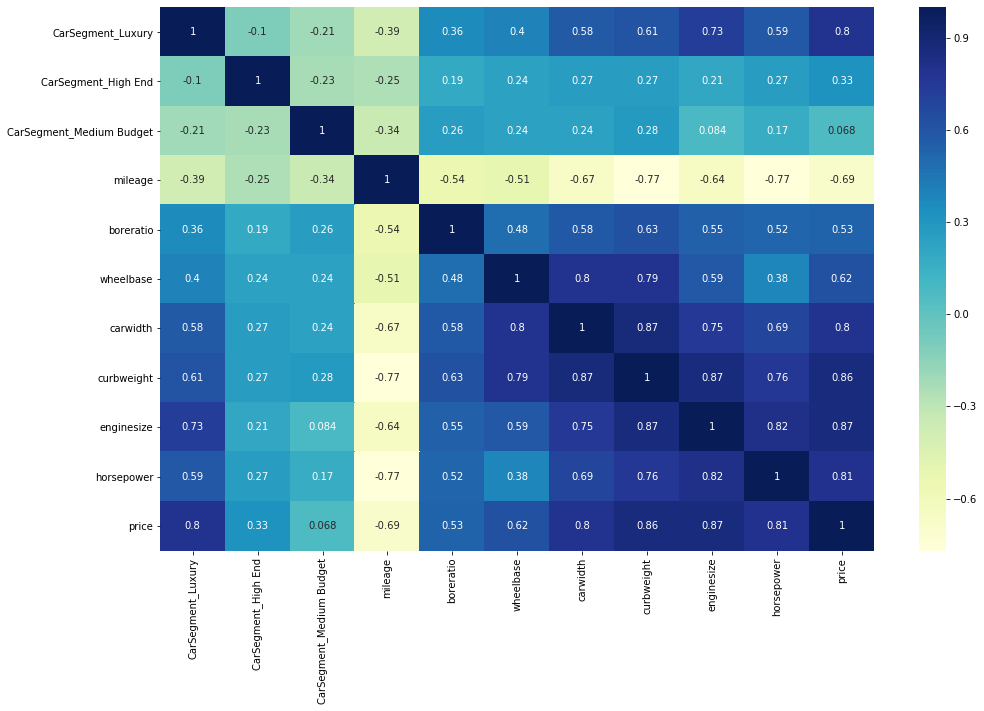

In [271]:
plt.figure(figsize = (16, 10))
sns.heatmap(car_price_train[['CarSegment_Luxury','CarSegment_High End','CarSegment_Medium Budget','mileage','boreratio','wheelbase','carwidth','curbweight','enginesize','horsepower','price']].corr(), annot = True, cmap="YlGnBu")
plt.show()

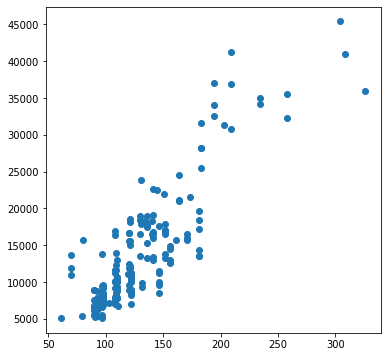

In [272]:
# since enginesize is most correlated we can plot a scatterplot for the price
plt.figure(figsize=[6,6])
plt.scatter(car_price.enginesize, car_price.price)
plt.show()


## Price Influencers-Independent Variables

### From the above analysis of correlation and graphs we are able to find that the below variables are significant and influence the Price of the car:




1. Car Width,
2. Curb Weight,
3. Engine Size,
4. Horsepower
5. WheelBase
6. BoreRatio
7. CarSegment


Below variable are negatively correlated

Mileage




In [273]:
y_train = car_price_train.pop('price')
X_train = car_price_train

In [274]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)            # running RFE
rfe = rfe.fit(X_train, y_train)

In [275]:
col = X_train.columns[rfe.support_]

X_train_rfe = X_train[col]
col

Index(['horsepower', 'curbweight', 'CarSegment_High End', 'CarSegment_Luxury',
       'enginetype_dohcv', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three'],
      dtype='object')

In [276]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

# Function to calculate the VIF

def calc_vif(frame):
    vif = pd.DataFrame()
    X = frame
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


  


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     199.2
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.66e-74
Time:                        16:40:15   Log-Likelihood:                 215.59
No. Observations:                 143   AIC:                            -409.2
Df Residuals:                     132   BIC:                            -376.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0387 

In [277]:
calc_vif(X_train_rfe)


,Features,VIF
0,const,36.60
9,cylindernumber_four,4.36
1,horsepower,4.29
2,curbweight,3.23
4,CarSegment_Luxury,2.19
8,cylindernumber_five,1.74
6,enginetype_ohcv,1.62
7,enginetype_rotor,1.48
5,enginetype_dohcv,1.42
3,CarSegment_High End,1.36


In [278]:
# Dropping as it has high p-value and is not statistically significant
X_train_new = X_train_rfe.drop('enginetype_rotor', axis = 1)

In [279]:

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     223.0
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.09e-75
Time:                        16:40:15   Log-Likelihood:                 215.58
No. Observations:                 143   AIC:                            -411.2
Df Residuals:                     133   BIC:                            -381.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0368 

In [280]:
calc_vif(X_train_new)

,Features,VIF
0,const,27.10
1,horsepower,4.25
2,curbweight,3.21
8,cylindernumber_four,3.04
4,CarSegment_Luxury,2.11
7,cylindernumber_five,1.54
6,enginetype_ohcv,1.50
5,enginetype_dohcv,1.41
3,CarSegment_High End,1.32
9,cylindernumber_three,1.18


In [281]:
# Dropping as it has p-value >0.05
X_train_new = X_train_new.drop('cylindernumber_three', axis = 1)  #higher p-value and is not statistically significant variable

In [282]:
  
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     252.0
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           7.88e-77
Time:                        16:40:15   Log-Likelihood:                 215.39
No. Observations:                 143   AIC:                            -412.8
Df Residuals:                     134   BIC:                            -386.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0311    

In [283]:
calc_vif(X_train_new)

,Features,VIF
0,const,22.78
1,horsepower,4.13
2,curbweight,3.16
8,cylindernumber_four,2.68
4,CarSegment_Luxury,2.11
7,cylindernumber_five,1.50
6,enginetype_ohcv,1.49
5,enginetype_dohcv,1.41
3,CarSegment_High End,1.32


In [284]:
X_train_new = X_train_new.drop(['cylindernumber_five'], axis = 1) #Dropping as it has p-value as it is statistically insignificant
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     287.9
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           7.27e-78
Time:                        16:40:15   Log-Likelihood:                 214.87
No. Observations:                 143   AIC:                            -413.7
Df Residuals:                     135   BIC:                            -390.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0232    

In [285]:
calc_vif(X_train_new)

,Features,VIF
0,const,19.84
1,horsepower,3.94
2,curbweight,3.03
4,CarSegment_Luxury,2.11
7,cylindernumber_four,2.04
5,enginetype_dohcv,1.41
6,enginetype_ohcv,1.36
3,CarSegment_High End,1.31


In [286]:
X_train_new = X_train_new.drop(['enginetype_dohcv'], axis = 1) #Dropping as it has higher VIF 
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     320.9
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.10e-77
Time:                        16:40:15   Log-Likelihood:                 211.32
No. Observations:                 143   AIC:                            -408.6
Df Residuals:                     136   BIC:                            -387.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0290    

In [287]:
calc_vif(X_train_new)

,Features,VIF
0,const,19.61
1,horsepower,3.06
2,curbweight,2.78
4,CarSegment_Luxury,2.06
6,cylindernumber_four,2.02
5,enginetype_ohcv,1.32
3,CarSegment_High End,1.31


In [288]:
X_train_new = X_train_new.drop(['enginetype_ohcv'], axis = 1) #higher p-value hence it is statistically insignificant
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     368.2
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.48e-77
Time:                        16:40:15   Log-Likelihood:                 207.84
No. Observations:                 143   AIC:                            -403.7
Df Residuals:                     137   BIC:                            -385.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0252    

In [289]:
calc_vif(X_train_new)

,Features,VIF
0,const,19.52
1,horsepower,2.98
2,curbweight,2.78
4,CarSegment_Luxury,2.06
5,cylindernumber_four,1.93
3,CarSegment_High End,1.30


Text(0.5, 0, 'Errors')

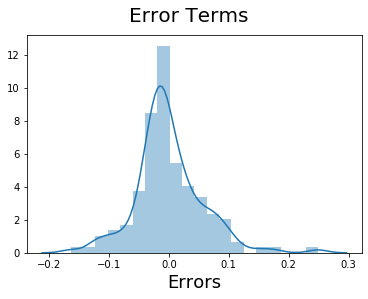

In [290]:
# Error Terms are Normally distributed and it satisfies the assumption of Linear Regression
y_train_price = lm.predict(X_train_new)
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [291]:
car_price_test[['mileage','boreratio','wheelbase','carwidth','curbweight','enginesize','horsepower','price']]=scaler.fit_transform(car_price_test[['mileage','boreratio','wheelbase','carwidth','curbweight','enginesize','horsepower','price']])


In [292]:
y_test = car_price_test.pop('price')
X_test = car_price_test
X_test.head()

,enginesize,boreratio,horsepower,mileage,carwidth,aspiration,wheelbase,curbweight,CarSegment_Medium Budget,CarSegment_High End,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
160,0.082969,0.515873,0.116129,1.000000,0.200000,0,0.265306,0.132148,0,0,...,1,0,0,0,0,1,0,0,0,0
186,0.131004,0.515873,0.212903,0.563636,0.315789,0,0.311953,0.219125,0,0,...,1,0,0,0,0,1,0,0,0,0
59,0.187773,0.674603,0.206452,0.509091,0.421053,0,0.355685,0.271985,0,0,...,1,0,0,0,0,1,0,0,0,0
165,0.082969,0.555556,0.387097,0.454545,0.157895,0,0.230321,0.214320,0,0,...,0,0,0,0,0,1,0,0,0,0
140,0.126638,0.857143,0.135484,0.490909,0.136842,0,0.195335,0.202307,0,0,...,0,1,0,0,0,1,0,0,0,0


In [293]:

X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [294]:
y_pred = lm.predict(X_test_new)

## Evaluation of Model

Text(0, 0.5, 'y_pred')

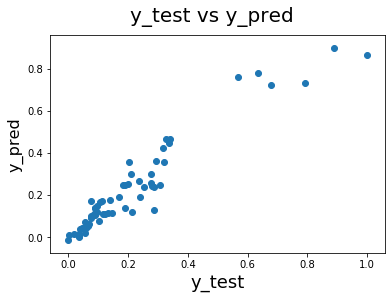

In [295]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [299]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9008059778277785

# Equation for Car Price Prediction



### Car Price = 0.0252 +  0.1698 x horsepower + 0.3621 x curbweight + 0.1582 x CarSegment_Highend + 0.3654 x CarSegment_Luxury  - 0.0517 x cylindernumber_four